In [1]:
#частина функцій, дію яких порівнюємо, в func
import pandas as pd
import numpy as np
import time
import func 
import matplotlib.pyplot as plt
plt.style.use("seaborn-pastel")
%matplotlib inline
import seaborn as sns
from timeit import timeit 
import sys

In [82]:
def p_create():   
    df = pd.read_csv('household_power_consumption.txt',index_col=False,  delimiter=';')
    df.columns=['date', 'time', 'g_a_p', 'g_r_p', 'voltage', 'g_int', 'sub_m_1','sub_m_2','sub_m_3']
    return df
df=p_create()

C:\Users\tangerine\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3254: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [138]:
#data=df.to_numpy()
def n_create():
    data = np.loadtxt('household_power_consumption.txt',dtype=object, delimiter=';')
    return data
data=n_create()


In [84]:
def create_plot(df0,data0,p_fun,n_fun):
    quan=[10**x for x in range(1,8)]
    p_time=[p_fun(df0.loc[:x,:]) for x in quan]
    n_time=[n_fun(data0[1:x,:]) for x in quan]
    fig, ax = plt.subplots()  
    plt.yscale('log')
    plt.xscale('log')
    ax.plot(quan,p_time, label='pandas')  
    ax.plot(quan,n_time, label='numpy') 
    ax.set_xlabel('quantity') 
    ax.set_ylabel('time')  
    ax.legend() 

In [85]:
data[1:10,:]

array([['16/12/2006', '17:24:00', '4.216', '0.418', '234.840', '18.400',
        '0.000', '1.000', '17.000'],
       ['16/12/2006', '17:25:00', '5.360', '0.436', '233.630', '23.000',
        '0.000', '1.000', '16.000'],
       ['16/12/2006', '17:26:00', '5.374', '0.498', '233.290', '23.000',
        '0.000', '2.000', '17.000'],
       ['16/12/2006', '17:27:00', '5.388', '0.502', '233.740', '23.000',
        '0.000', '1.000', '17.000'],
       ['16/12/2006', '17:28:00', '3.666', '0.528', '235.680', '15.800',
        '0.000', '1.000', '17.000'],
       ['16/12/2006', '17:29:00', '3.520', '0.522', '235.020', '15.000',
        '0.000', '2.000', '17.000'],
       ['16/12/2006', '17:30:00', '3.702', '0.520', '235.090', '15.800',
        '0.000', '1.000', '17.000'],
       ['16/12/2006', '17:31:00', '3.700', '0.520', '235.220', '15.800',
        '0.000', '1.000', '17.000'],
       ['16/12/2006', '17:32:00', '3.668', '0.510', '233.990', '15.800',
        '0.000', '1.000', '17.000']], dtype='<U

C:\Users\tangerine\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


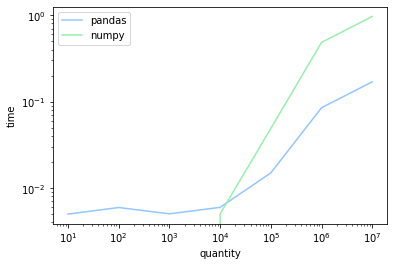

In [94]:
#видалення '?', для numpy до 10^4 недостатньо точне вимірювання часу
def p_del(df0):
    start_time = time.time()
    df0.loc[~df['sub_m_2'].isin(['?'])]
    return time.time() - start_time
def n_del(data0):
    start_time = time.time()
    data0[np.where(data0[1:,6]!='?')]
    return time.time() - start_time
create_plot(df,data,p_del,n_del)

In [87]:
quan=[10**x for x in range(1,8)]
n_time=[n_del(data[1:x,:]) for x in quan]
n_time

[0.0010290145874023438,
 0.0,
 0.0,
 0.006951093673706055,
 0.05185985565185547,
 0.436298131942749,
 0.9174985885620117]

In [140]:
df=df.loc[~df['sub_m_2'].isin(['?'])]
data=data[np.where(data[:,4]!='?')]

C:\Users\tangerine\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [101]:
data[np.where(data[:,2]=='?')]

array([], shape=(0, 9), dtype='<U21')

In [142]:
df.loc[:,'g_a_p':'sub_m_3']=df.loc[:,'g_a_p':'sub_m_3'].apply(pd.to_numeric)
#data[1:,2:]=data[1:,2:].astype(float)
#не спрацювало, тому нище перетворення циклом

In [157]:
#data[1:,2]=data[1:,2].astype(float)
for y in (2,data[1:,:].shape[1]-1):
    for x in (1,data[1:,y].shape[0]):
        data[x,y]=float(data[x,y])
type(data[2,2])
type(data[2,4])

float

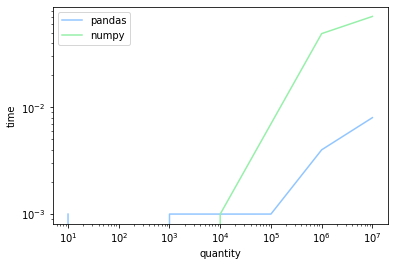

In [146]:
#1 пункт
def p_1(df0):
    start_time = time.time()
    df0.loc[df0['g_a_p']>5]
    times=time.time() - start_time
    return times
def n_1(data0):   
    start_time = time.time()
    data0[np.where(data0[1:,2]>5.0)]
    return (time.time() - start_time)
create_plot(df,data,p_1,n_1)


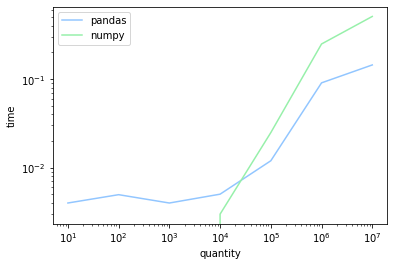

In [159]:
def p_2(df0):    
    start_time = time.time()
    df0.loc[df['voltage']>235]
    return time.time() - start_time
def n_2(data0):
    start_time = time.time()
    data0[np.where(data0[1:,4]>235.0)]
    return time.time() - start_time 
create_plot(df,data,p_2,n_2)

In [ ]:
data[1:10,:]

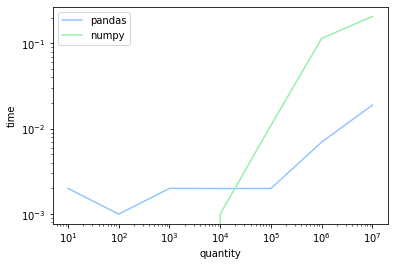

In [160]:
def p_3(df0):  
    start_time = time.time()
    df0.loc[(df0['g_int']>=19) & (df0['g_int']<=20) & (df0['sub_m_2'] > df0['sub_m_3'])]
    return time.time() - start_time
def n_3(data0):
    start_time = time.time()
    data0[np.where((data0[:,5]>=19) & (data0[:,5]<=20) & (data0[:,7] > data0[:,8]))]
    return time.time() - start_time
create_plot(df,data,p_3,n_3)

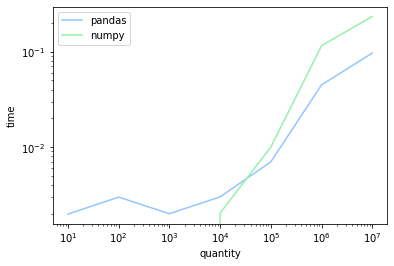

In [170]:
def p_5(df0):  
        start_time = time.time()
        #df2['g_mean']=df2[['g_a_p', 'g_r_p']].mean(axis=1)
        df2=df0.loc[((df0['time']>='18:00:00')& (df0['g_a_p']>6) & (df0['sub_m_2'] > df0['sub_m_1']) & (df0['sub_m_2'] > df0['sub_m_3']))]
        df2=df2.reset_index(drop=True)
        df2.loc[:df2.shape[0]/2,:][0::3]             
        df2.loc[df2.shape[0]/2:,:][::4]
        return time.time() - start_time
def n_5(data0):
    start_time = time.time()
    #data3=np.concatenate((data3, (np.mean(data3[:,2:4], axis = 1)).reshape((data3.shape[0],1))),axis=1)
    data4=data0[np.where((data0[:,0]>='18:00:00') & (data0[:,2]>6.0) & (data0[:,7] > data0[:,6]) & (data0[:,7] > data0[:,8]))]
    list=np.array_split(data4,2,axis=1)
    list[0][::4]
    list[1][::3]
    return time.time() - start_time
create_plot(df,data,p_5,n_5)